In [11]:
import numpy as np, pandas as pd
import json
import matplotlib.pyplot as plt

#import py modules:
import PES_data_processor as pdata, PES_models as pmodel

## ansatz vs CHIPR on OH$^+$ data

In [66]:
list_data = np.load('data/hxoy_data.npy', allow_pickle=True) #reload
list_data = list_data[()]

In [30]:
mol = "OH+"
qidxes = pdata.query_one_var_indices(mol, "mol", list_data)

In [15]:
#display the table result:
data = pd.read_pickle("result/performance_22102021.pkl")
'''
data["simulation_time"] = 2429.074455499649
data["eval_loop"] = loop; data["eval_run"] = n;
data.to_pickle("result/performance_19102021_2.pkl")
print(data)
'''
display = data[['num_params', 'ansatz_acc', 'chipr_acc','ansatz_t', 'chipr_t', ]]
display

,num_params,ansatz_acc,chipr_acc,ansatz_t,chipr_t
0,13,0.000256,0.000230,0.410673,0.456578
1,22,0.000162,0.000209,0.591657,0.784567
2,31,0.000039,0.000195,0.781771,1.118280
3,40,0.000054,0.000235,0.951766,1.416891
4,49,0.000029,0.000090,1.134819,1.742435
5,58,0.000072,0.000152,1.316050,2.063720
6,67,0.000137,0.000194,1.505820,2.398215
7,76,0.000147,0.000178,1.688335,2.716334
8,85,0.000070,0.000215,1.872056,3.033693


==== Optimization stats ====
optimization restarts =  20
optimization power =  5
delta threshold =  1e-05
evaluation loops =  10000
evaluation runs =  20
elapsed time =  15252.74796128273 s


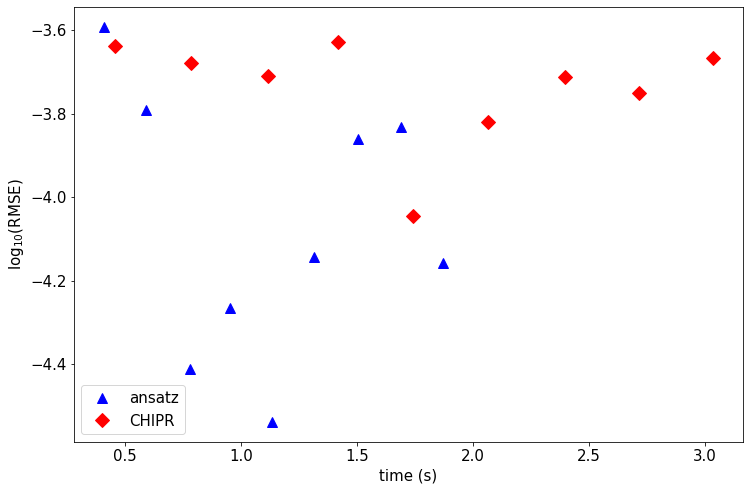

In [26]:
## plot of the table (finding which model is the best)
plt.rcParams.update({'font.size': 15})
plt.subplots(figsize=(12, 8))
markersize = 10
plt.plot(data["ansatz_t"], np.log10(data["ansatz_acc"]), 'b^', markersize=markersize)
plt.plot(data["chipr_t"], np.log10(data["chipr_acc"]), 'rD', markersize=markersize)
plt.xlabel("time (s)"); plt.ylabel("log$_{10}$(RMSE)")
plt.legend(["ansatz", "CHIPR"])
print("==== Optimization stats ====")
#print("data: ", list_data[qidxes[0]]["mol"], list_data[qidxes[0]]["state"], list_data[qidxes[0]]["author"], len(R),"data points")
print("optimization restarts = ",data["opt_restart"][0])
print("optimization power = ", data["opt_power"][0])
print("delta threshold = ", data["opt_delta"][0])
print("evaluation loops = ",data["eval_loop"][0])
print("evaluation runs = ",data["eval_run"][0])
print("elapsed time = ", data["simulation_time"][0], "s")

## Error plots

### <li>  Joint fit OH$^+$, ansatz vs CHIPR

In [48]:
#Query the data:
mol = "OH+"
qidxes = pdata.query_one_var_indices(mol, "mol", list_data)

#join the R and V:
R_list = []; V_list = []
for i in qidxes:
    R = list_data[i]["R"]
    V = list_data[i]["V"]
    R_list.append(R); V_list.append(V)

R_list = np.array(R_list); V_list = np.array(V_list)
R = np.concatenate(R_list)
V = np.concatenate(V_list)

C:\Users\beryl\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


In [53]:
data = pd.read_pickle("result/res_joint_OH+_271021_153617.pkl")
C_ans = np.array(data["ansatz_C"]); C_chipr = np.array(data["chipr_C"])

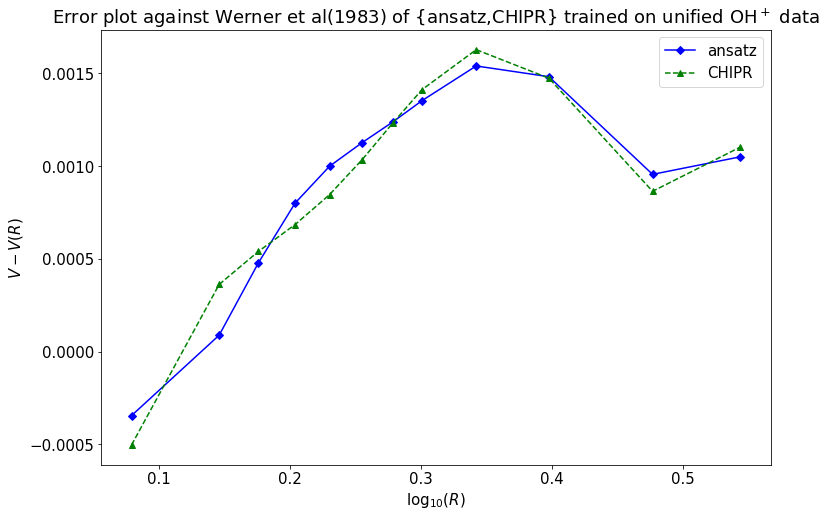

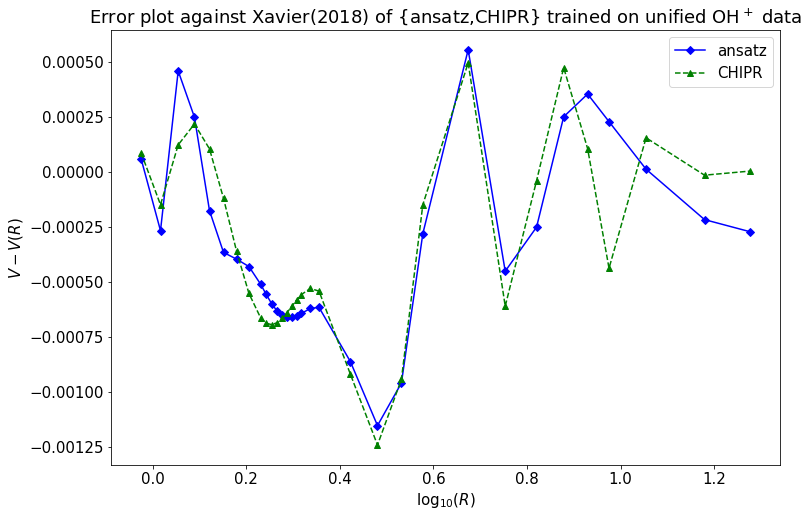

In [56]:
#plot the error on all OH+ data, error of ansatz vs CHIPR:
err_ans = []; err_chipr = [] #[0] on werner, [1] on xavier
Z = 8 
M = int((len(C_ans)-1)/3)
m = int((2*M - 2)/3)
shapes = ["-bD","--g^"]
for i in range(len(V_list)):
    #ansatz:
    V_pred = pmodel.f_diatomic_vdw(C_ans, R_list[i], Z, M)
    err_a = V_pred - V_list[i]
    V_preds.append(V_pred) #using the ansatz
    err_ans.append(err_a)
    
    #chipr:
    
    V_pred = pmodel.f_diatomic_chipr_ohplus(C_chipr, R_list[i], Z, M, m)
    err_c = V_pred - V_list[i]
    V_preds.append(V_pred) #using the ansatz
    err_chipr.append(err_c)
    
    
    legends = []
    plt.subplots(figsize=(12, 8))
    #for i in range(2): #ansatz and chipr
    plt.plot(np.log10(R_list[i]), err_a, shapes[0])
    plt.plot(np.log10(R_list[i]), err_c, shapes[1])
    data = list_data[qidxes[i]]
    legends = ["ansatz", "CHIPR"]
    plt.xlabel("log$_{10}(R)$")
    plt.ylabel("$V-V(R)$")
    plt.legend(legends)
    plt.title("Error plot against "+str(list_data[qidxes[i]]["author"])+" of {ansatz,CHIPR} trained on unified OH$^+$ data" )

### <li> Separate fit

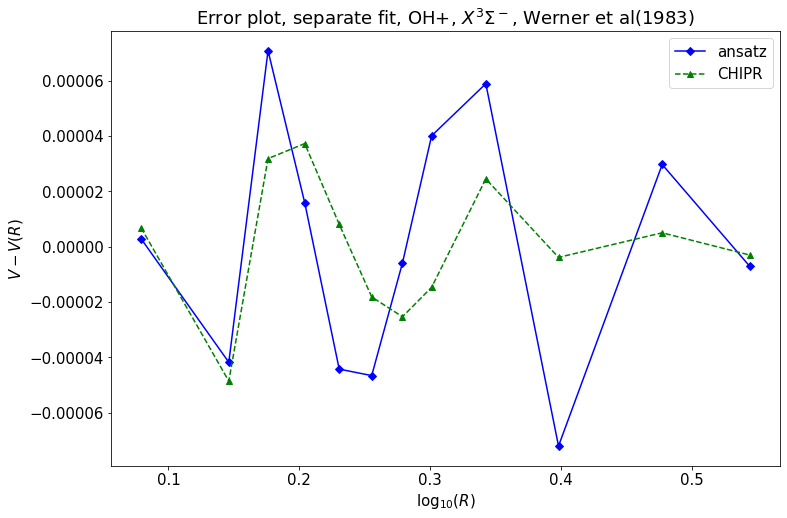

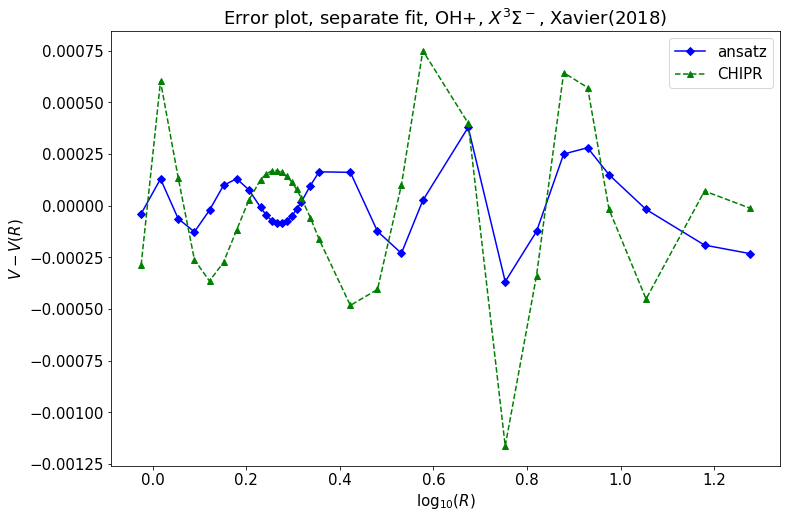

In [71]:
data = pd.read_pickle("result/res_each_state_271021_145320.pkl")
# OH+:
mol = "OH+"
Z = 8 #for OH+
M = int((data["num_params"][0]-1)/3)
m = int((2*M - 2)/3)
#get the C:
length = data.shape[0]
shapes = ["-bD","--g^"]
for i in range(length):
    if data["mol"][i] == mol:
        #plot per mol per state per author:
        qidx = pdata.query_many_vars_indices([mol, data["state"][i], data["author"][i]], ["mol", "state", "author"], list_data)
        R = list_data[qidx[0]]["R"]; V = list_data[qidx[0]]["V"]
        
        #ansatz:
        C = data["ansatz_C"][i]
        V_pred = pmodel.f_diatomic_vdw(C, R, Z, M)
        err_a = V_pred - V

        #chipr:
        C = data["chipr_C"][i]
        V_pred = pmodel.f_diatomic_chipr_ohplus(C, R, Z, M, m)
        err_c = V_pred - V
        
        plt.subplots(figsize=(12, 8))
        plt.plot(np.log10(R), err_a, shapes[0])
        plt.plot(np.log10(R), err_c, shapes[1])
        legends = ["ansatz", "CHIPR"]
        plt.xlabel("log$_{10}(R)$")
        plt.ylabel("$V-V(R)$")
        plt.legend(legends)
        plt.title("Error plot, separate fit, "+str(data["mol"][i])+", "+str(data["state"][i])+", "+str(data["author"][i]) )